In [73]:
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import shapely.wkt

In [2]:
df = pd.read_parquet('performance/type=fixed/year=2019/quarter=1/2019-01-01_performance_fixed_tiles.parquet', engine='pyarrow')

In [3]:
df.head()

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,0022133222312322,"POLYGON((-160.02685546875 70.6435894914449, -1...",8763,3646,45,1,1
1,0022133222330013,"POLYGON((-160.032348632812 70.6399478155463, -...",9195,3347,43,1,1
2,0022133222330023,"POLYGON((-160.043334960938 70.6363054807905, -...",6833,3788,42,1,1
3,0022133222330100,"POLYGON((-160.02685546875 70.6417687358462, -1...",8895,3429,43,2,2
4,0022320121121332,"POLYGON((-166.739501953125 68.3526207780586, -...",4877,935,45,3,2


In [87]:
p1 = df['tile'][0]
p1

'POLYGON((-160.02685546875 70.6435894914449, -160.021362304688 70.6435894914449, -160.021362304688 70.6417687358462, -160.02685546875 70.6417687358462, -160.02685546875 70.6435894914449))'

## Leemos las coordenadas del polígono que forma Bolivia (http://boundaries.us/country/bo/)
Nota: La latitud (expresada como Y) proporciona la localización de un lugar en dirección Norte o Sur desde el ecuador mientras que la longitud (expresada com X) proporciona la localización de un lugar en dirección Este u Oeste desde el meridiano de Greenwich.

In [11]:
df_bol = pd.read_csv('../bo.csv')

In [12]:
df_bol.head()

,lat,long
0,-22.09473,-65.19020
1,-22.10000,-65.59889
2,-22.10889,-65.65750
3,-22.11334,-65.73418
4,-22.11167,-65.74806


In [61]:
# Generamos un Polígono con las coordenadas que mapean a Bolivia
bolivia_coor = [(long, lat) for lat, long in zip(df_bol['lat'], df_bol['long'])]

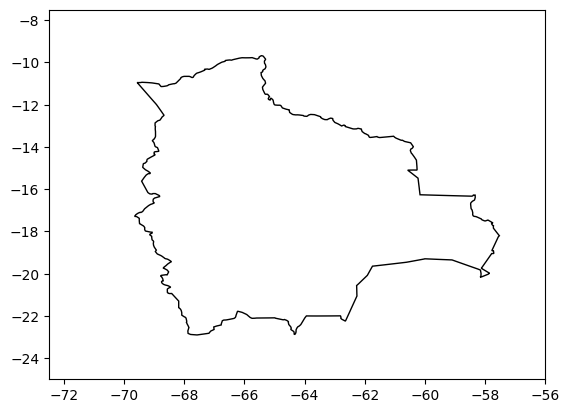

In [60]:
polygon = plt.Polygon(bolivia_coor, closed=True, fill=None)

# Creamos el plot y agregamos el polígono
_, ax = plt.subplots()
ax.add_patch(polygon)

# Configuramos los límites del gráfico
ax.set_xlim(-72.5, -56)
ax.set_ylim(-25, -7.5)

plt.show()

## Procedemos a filtrar las coordenadas del dataset origen con aquellos polígonos en donde su área caiga dentro de nuestro polígono de Bolivia

In [85]:
bolivia_coor[:5]

[(-65.1902, -22.09473),
 (-65.59889, -22.1),
 (-65.6575, -22.10889),
 (-65.73418, -22.11334),
 (-65.74806, -22.11167)]

In [92]:
# Corregimos las coordenadas para que tenga el formato de (latitud, long)
bolivia_polygon = Polygon([coor[::-1] for coor in bolivia_coor])

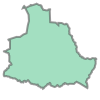

In [93]:
bolivia_polygon

In [98]:
# Convertimos los strings de la columna tile a tipo Polygon
df['tile'] = [shapely.wkt.loads(polygon) for polygon in df['tile']]

In [103]:
# Recuperamos todos los índices de los records que pertenecen a Bolivia
bolivian_records = [i for i, polygon in enumerate(df['tile']) if polygon.within(bolivia_polygon)]

In [102]:
bolivian_records

[]

In [106]:
tp = Polygon([(-14.822119, -71.688163), (-14.843360, -70.523613), (-15.680661, -71.644218), (-16.039976, -70.084160)])

In [109]:
df['tile'][56315].within(bolivia_polygon)

False

In [ ]:
!pip uninstall pycountry